The purpose of this notebook is to explore legacy TCGA BRCA gene expression data.

# Librairies

In [1]:
import os
import sys
code_path = os.path.split(os.path.split(os.getcwd())[0])[0]
sys.path.append(code_path)
import json
from setting import *
from download_data import *
from dataset import *
from plots_and_stats import *
from utils import *
from loader import *

set_pyplot()

/projects/GraphNEx/anaconda3/envs/GraphNEx/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Path

In [2]:
name = 'BRCA-pam'
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Dataset

### Original dataset

Information from [XENA browser](https://xenabrowser.net/datapages/?dataset=TCGA.BRCA.sampleMap%2FHiSeqV2&host=https%3A%2F%2Ftcga.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443): the gene expression profile is expressed in log2(x+1) transformed RSEM normalized count.

RSEM is a technique used to estimate more accurately gene expression levels from RNA-Seq data.

The normalisation is probably raw count (*count*) divided by the 75th percentile of each individual sample and multiplied by 1000 (*count_uq*). As the 75th percentile of each individual sample is around 850, it seems to make sense. 

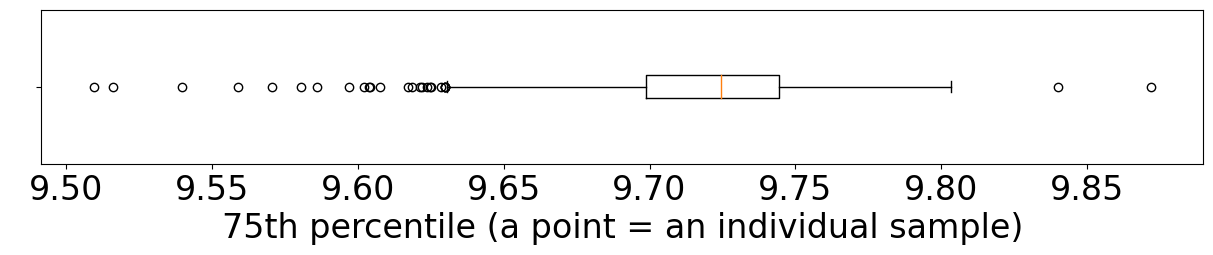

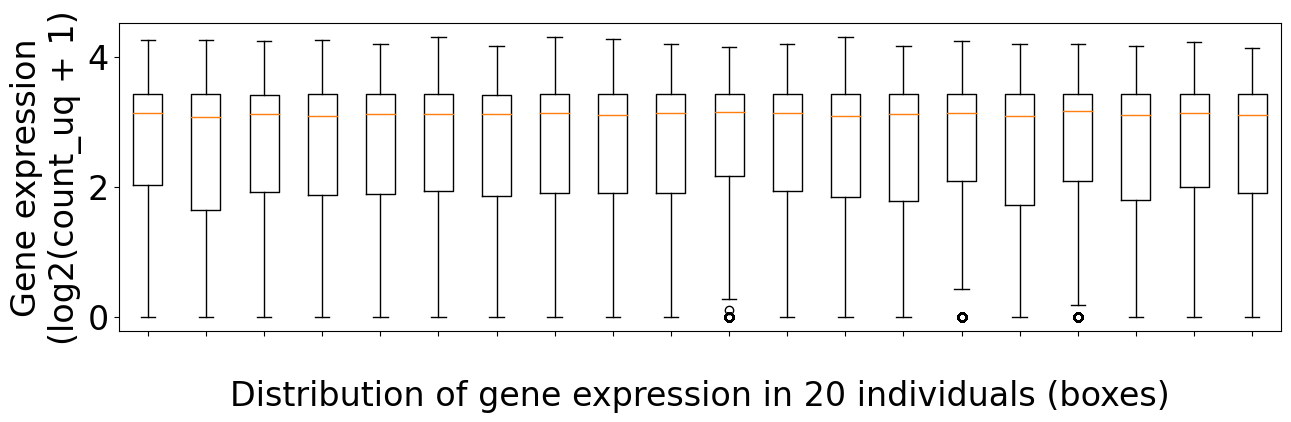

In [4]:
# Dataset
X, y, class_name, feat_name = load_data(data_path, name,
                                        weakly_expressed_genes_removed=False, 
                                        ood_samples_removed=False)

# Percentile
plt.figure(figsize=(15, 2))
percentile = np.percentile(X, 75, axis=1)
plt.boxplot(percentile, vert=False)
plt.yticks(color='w')
plt.xlabel('75th percentile (a point = an individual sample)')
plt.show()

# Boxplots
ylabel = f'Gene expression\n(log2(count_uq + 1)'
describe_random_individuals(np.log2(X + 1), ylabel)

### Normalised dataset

In our work, each sample is expressed in log2(norm_count+1), where norm_count means that the sum of the gene values per sample is $10^6$. Before this normalisation step, the genes that are weakly expressed are removed from the study (cf Scripts/Preprocessing/quality_control.py). 

6780 weakly expressed genes are removed of the dataset.


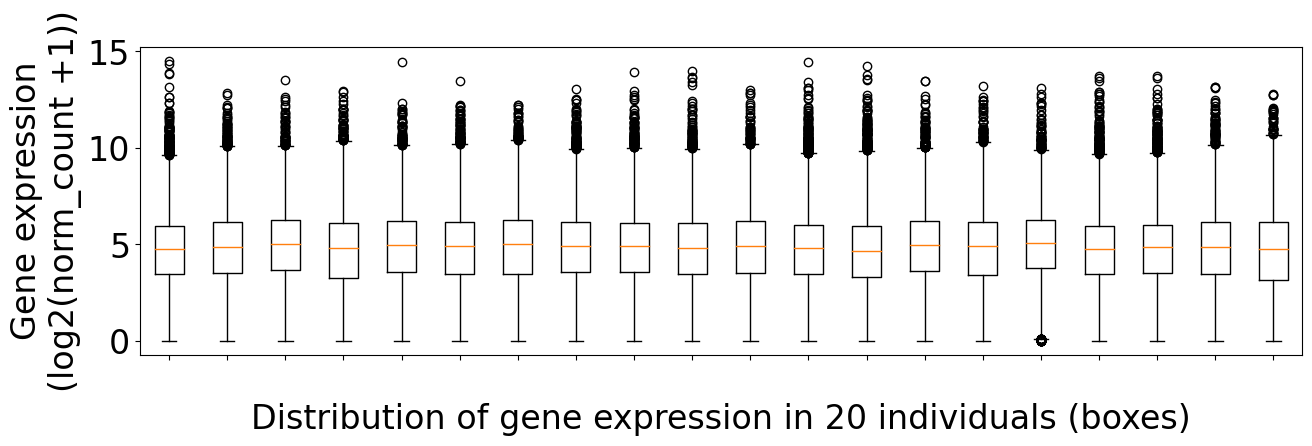

In [6]:
# Normalised dataset
X, y, class_name, feat_name = load_data(data_path, name, 
                                        weakly_expressed_genes_removed=True, 
                                        ood_samples_removed=True)
_, _, log2, reverse_log2, divide_by_sum, factor = get_data_normalization_parameters(name)
if reverse_log2:
    X = transform_data(X, transform='reverse_log2')
if divide_by_sum:
    X = transform_data(X, transform='divide_by_sum', factor=factor)
if log2:
    X = transform_data(X, transform='log2')
    
# Boxplots
ylabel = f'Gene expression\n(log2(norm_count +1))'
describe_random_individuals(X, ylabel)

# Additional figures

### Distribution of the values of gene expression

Mean:  1041.52
Median:  282.89
Max:  2065985.33
Min:  0.0
Number of times the expression of a gene is equal to 0: 972230


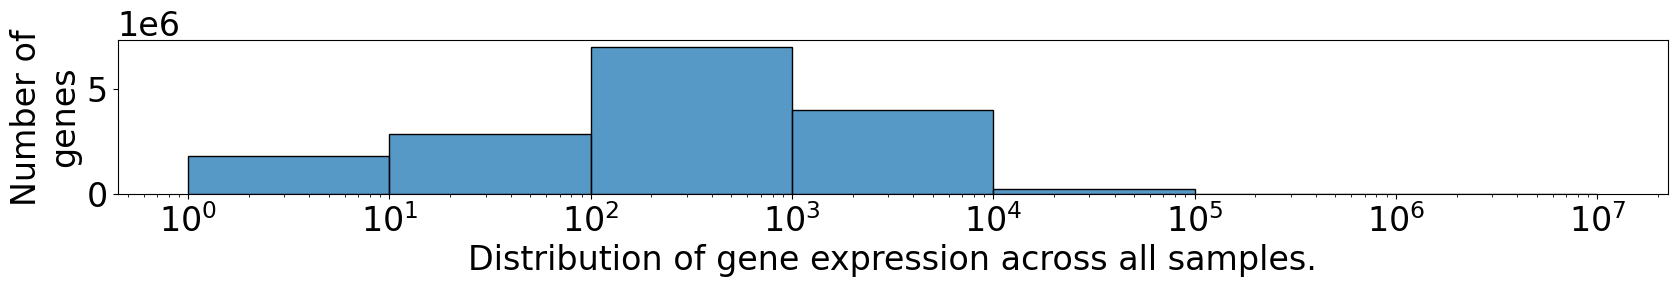

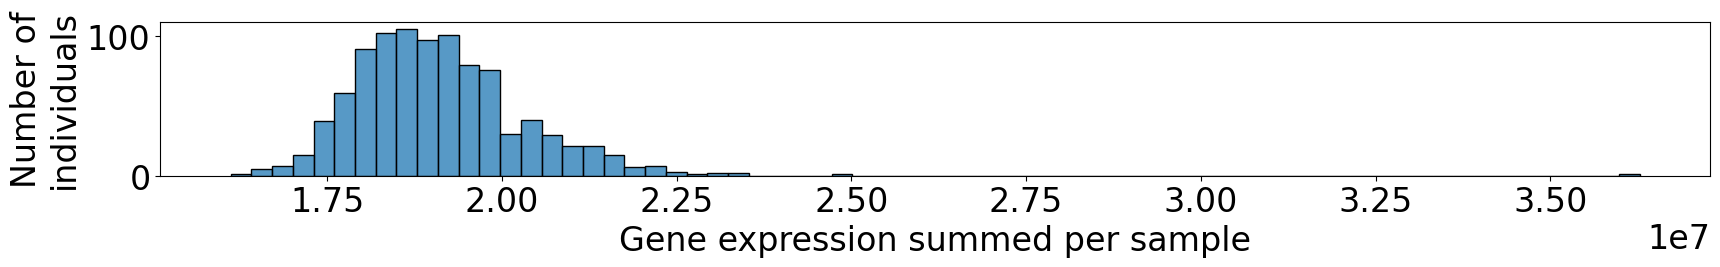

In [8]:
describe_gene_expression(2**X - 1, log_scale=False)

There are 0 genes whose average expression is 0.


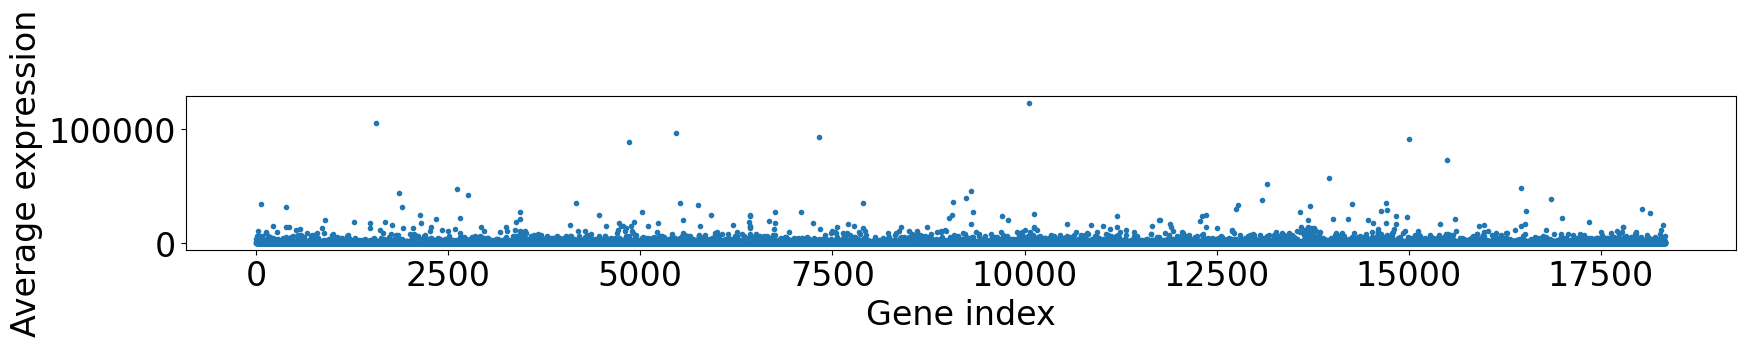

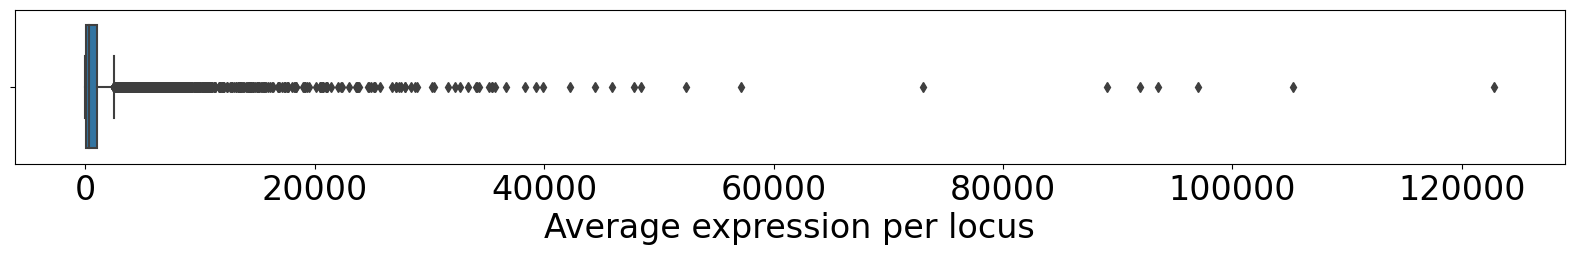

In [9]:
# criteria = 'average', 'median', 'std', 'min', 'max'
plot_stats_on_gene_expression(2**X - 1, criteria='average')

There are 787 genes whose median expression is 0.


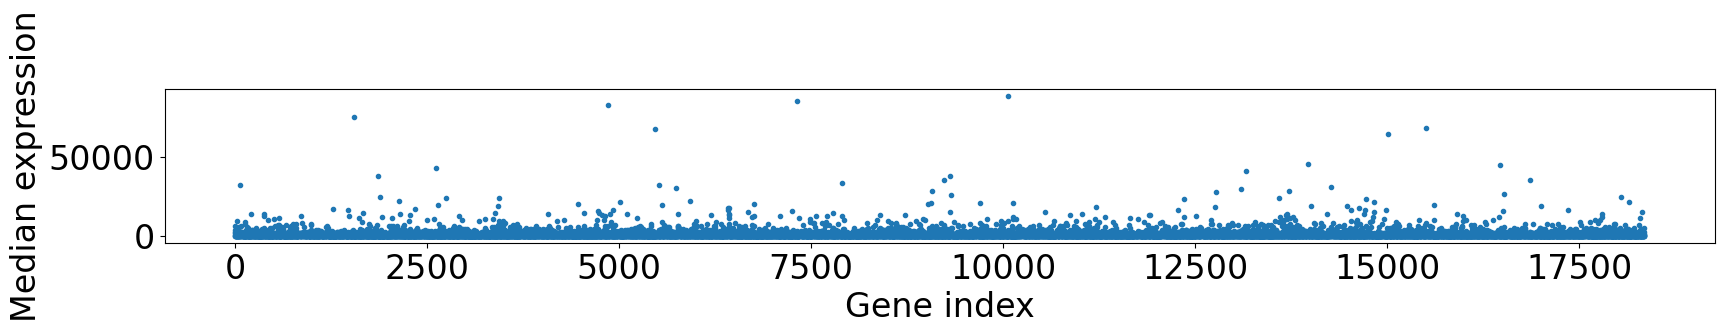

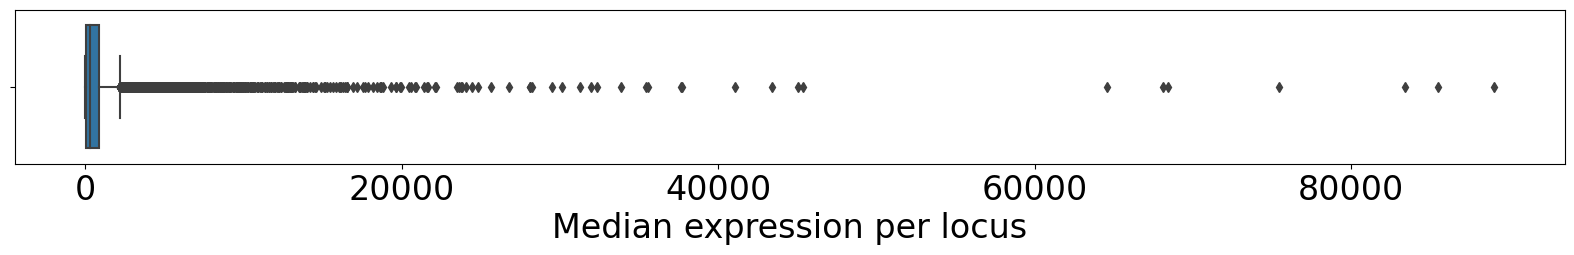

In [10]:
plot_stats_on_gene_expression(2**X - 1, criteria='median')

There are 0 genes whose maximum is 0.


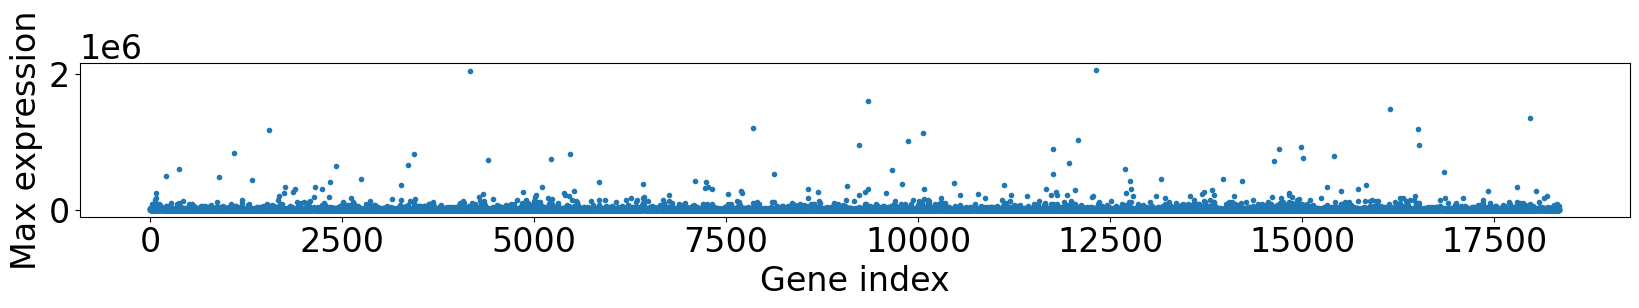

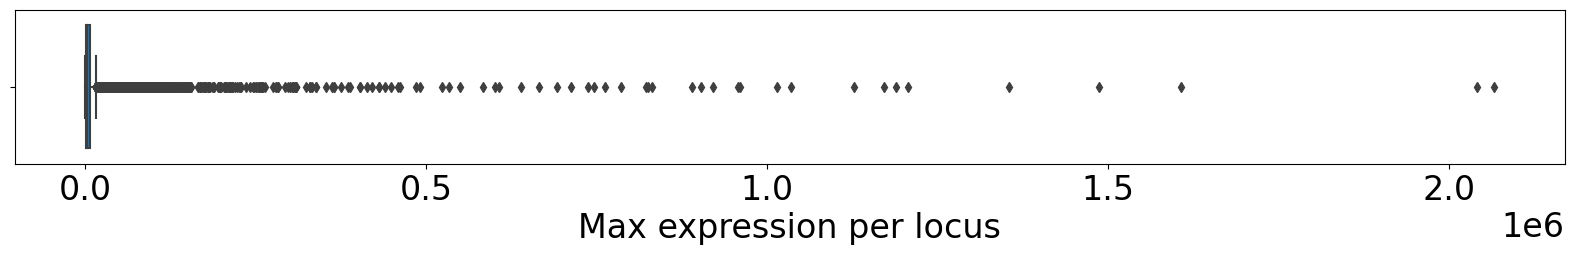

In [11]:
plot_stats_on_gene_expression(2**X - 1, criteria='max')

There are 0 genes whose average expression is 0.


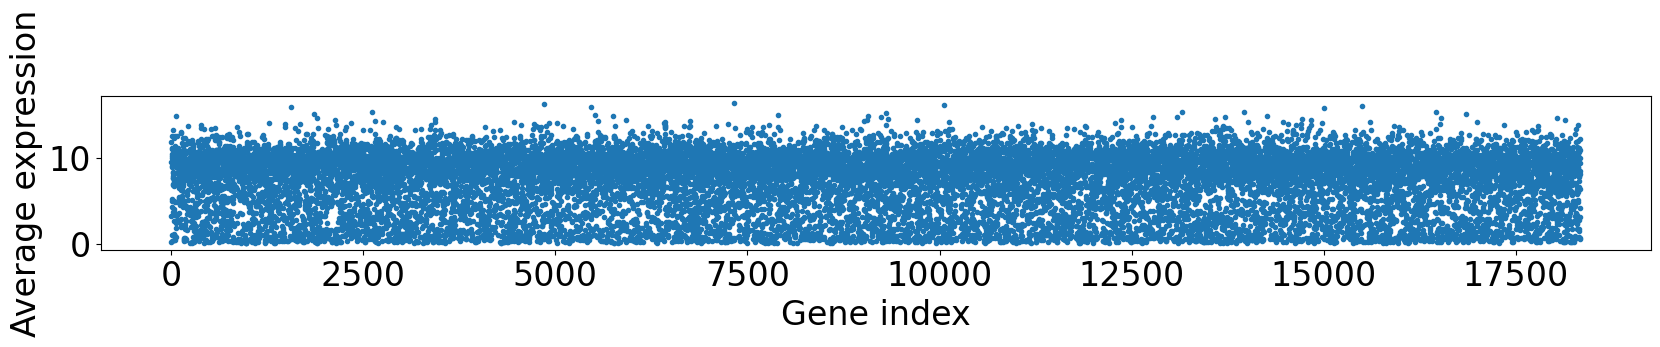

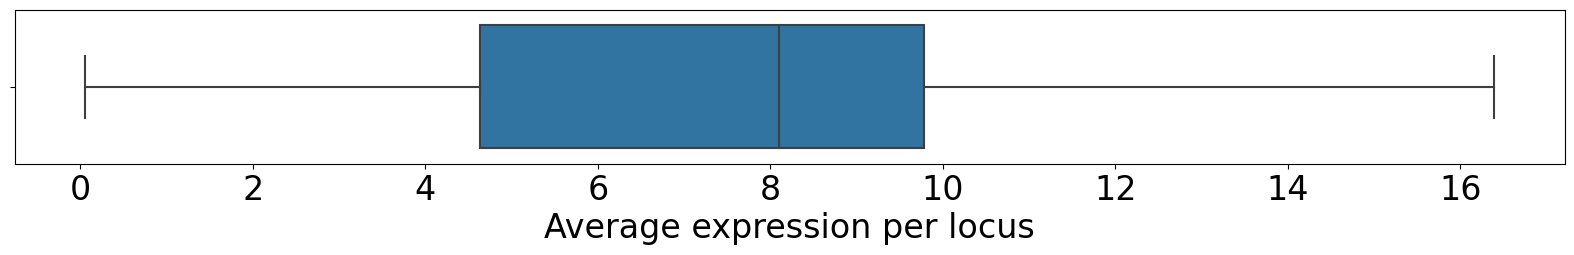

In [12]:
plot_stats_on_gene_expression(X, criteria='average')

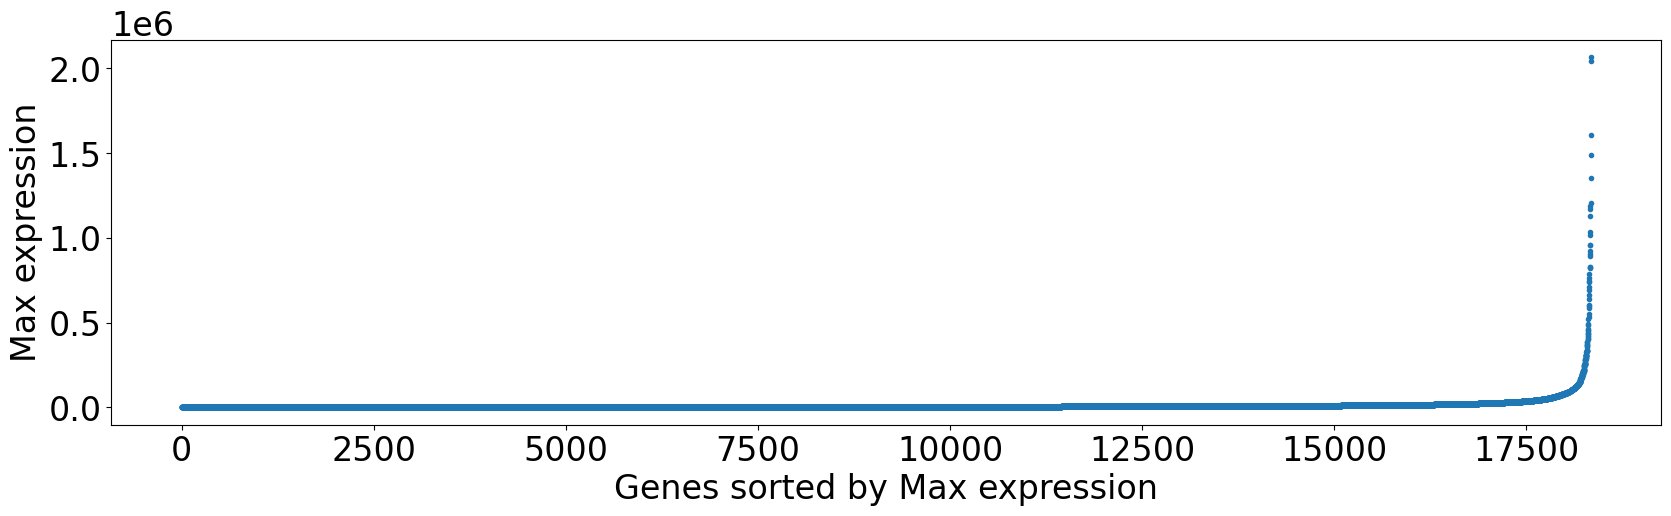

In [13]:
ordered_genes = sort_genes(2**X-1, criteria='max') # 'average', 'median', 'std', 'min', 'max'

### Analysis of a gene

In [14]:
# Code to find the index of a gene from its name.
# np.argwhere(np.array([gene.split('|')[0] for gene in feat_name]) == 'ACPP')

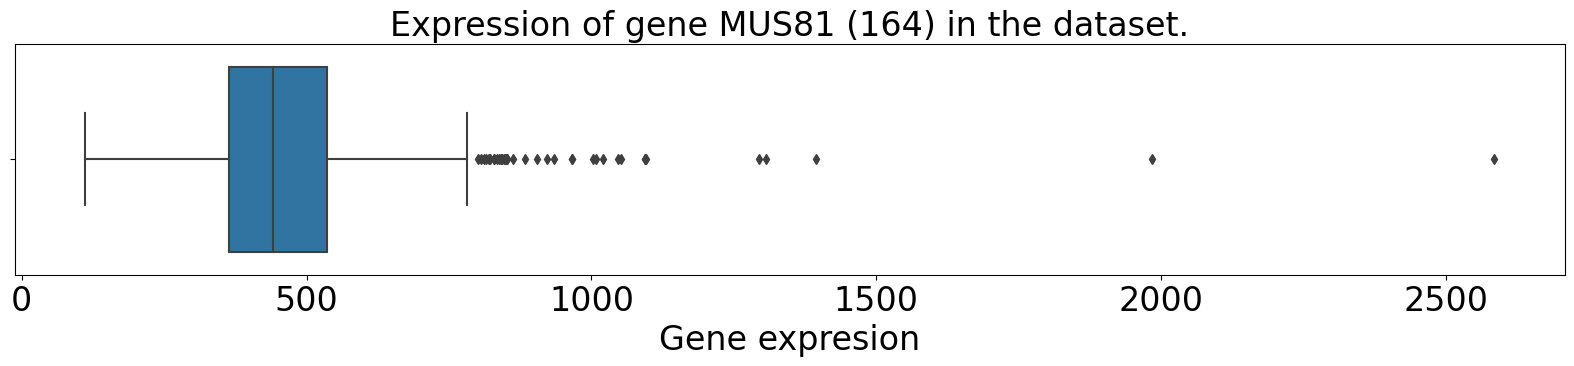

In [15]:
plot_random_gene_expression(2**X - 1, y, feat_name, class_name, group_by_classes=False, gene_index=164)

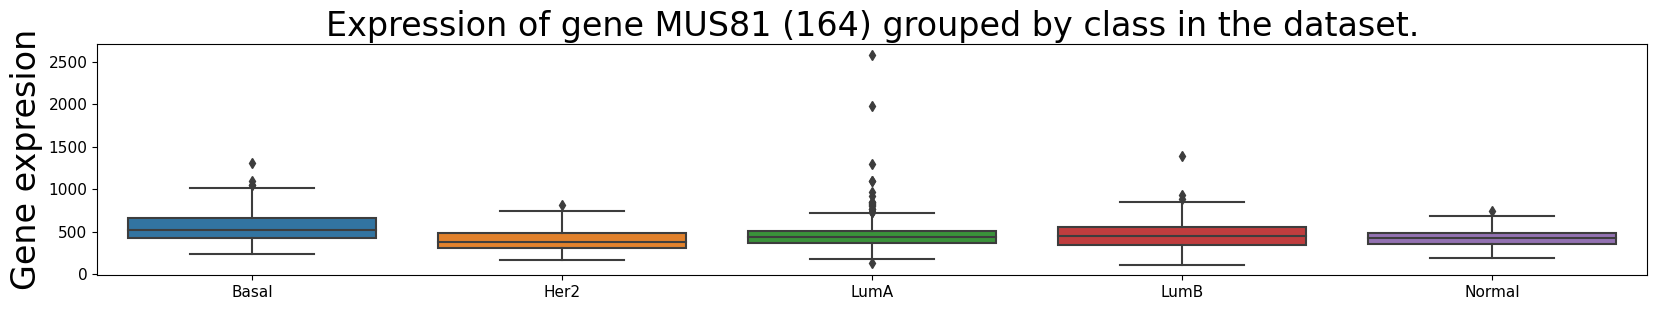

In [16]:
plot_random_gene_expression(2**X - 1, y, feat_name, class_name, group_by_classes=True, gene_index=164)

### Analysis of a sample

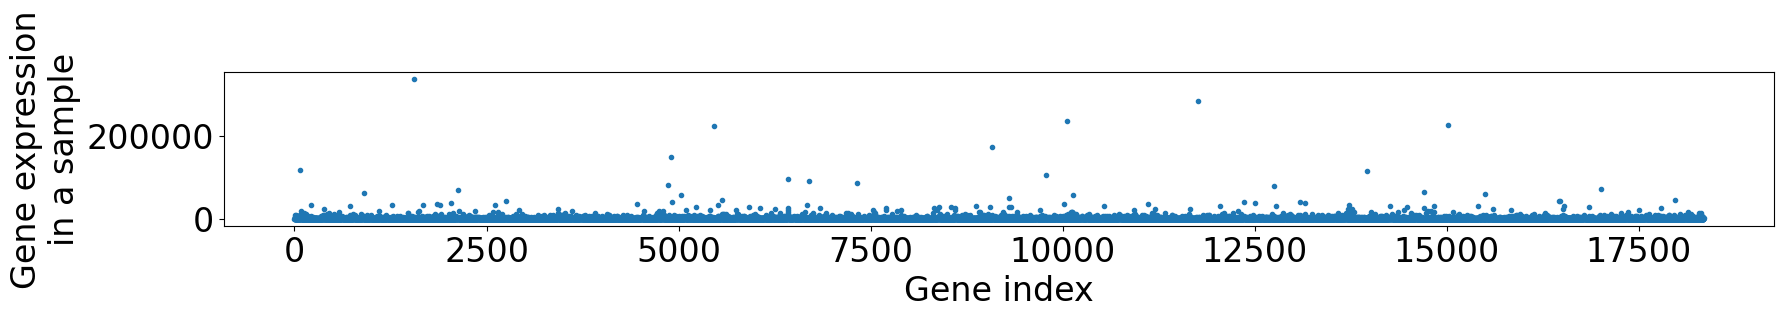

In [17]:
plot_random_sample_expression(2**X - 1)